In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")
data = pd.read_csv("telco_customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# Converting Total Charges to a numerical data type.
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors="coerce")
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
# Impute missing values with 0
data["TotalCharges"] = data["TotalCharges"].replace(" ", 0).astype("float32")
# data["TotalCharges"] = data["TotalCharges"].replace(" ", np.nan)

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object

Text(0.5, 1.0, 'Number of customers by their tenure')

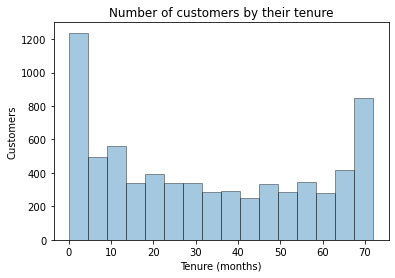

In [8]:
ax = sns.distplot(data["tenure"], hist=True, kde=False, hist_kws={"edgecolor":"black"}, kde_kws={"linewidth": 6})
ax.set_ylabel("Customers")
ax.set_xlabel("Tenure (months)")
ax.set_title("Number of customers by their tenure")

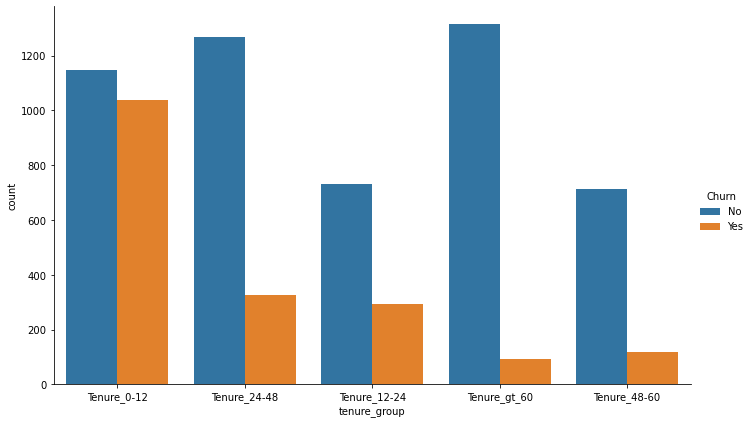

In [9]:
# Creating categorical columns for tenure feature
def tenure_lab(data):
    if data["tenure"] <= 12:
        return "Tenure_0-12"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24):
        return "Tenure_12-24"
    elif (data["tenure"] > 24) & (data["tenure"] <= 48):
        return "Tenure_24-48"
    elif (data["tenure"] > 48) & (data["tenure"] <= 60):
        return "Tenure_48-60"
    elif data["tenure"] > 60:
        return "Tenure_gt_60"
data["tenure_group"] = data.apply(lambda data:tenure_lab(data), axis=1)

# Customer attrition in tenure groups
sns.catplot(x="tenure_group", hue="Churn", kind="count", data=data, aspect=1.6, height=6)

In [10]:
# Removing missing values
data.dropna(inplace=True)

# Replace binary values to numeric values
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes", 0:"No"})

# Converting the predictor variable to binary numeric variable
df = data.iloc[:,1:]
df["Churn"].replace(to_replace="Yes", value=1, inplace=True)
df["Churn"].replace(to_replace="No", value=0, inplace=True)
df_dummies = pd.get_dummies(df)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
0,1,29.85,29.850000,0,1,0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,0
1,34,56.95,1889.500000,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,2,53.85,108.150002,1,0,1,1,0,1,0,...,1,0,0,0,1,1,0,0,0,0
3,45,42.30,1840.750000,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,2,70.70,151.649994,1,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,0


<AxesSubplot:>

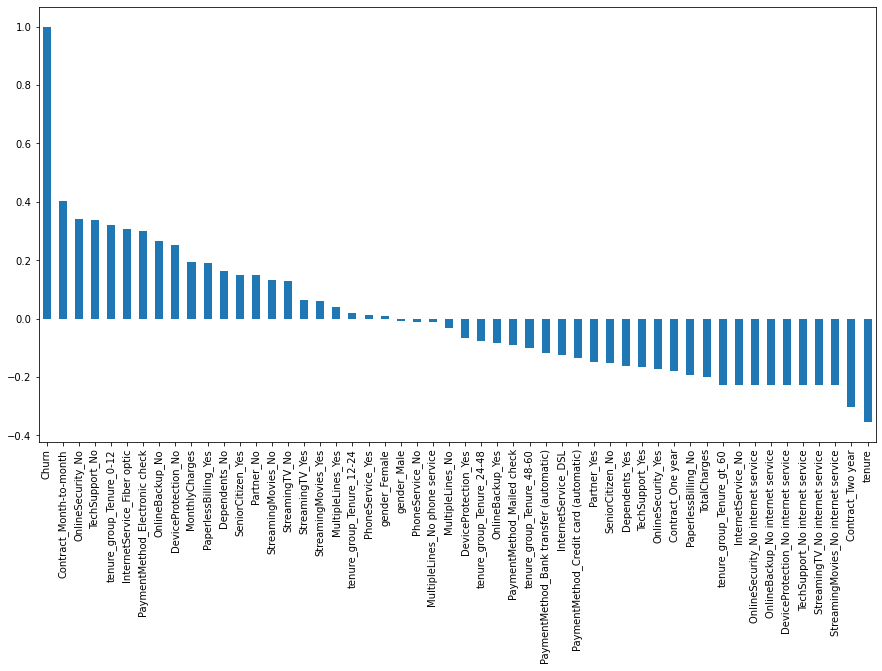

In [11]:
# Correlation of Churn with other features
plt.figure(figsize=(15,8))
df_dummies.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")

Text(0.5, 1.0, 'Number of customers by contract type')

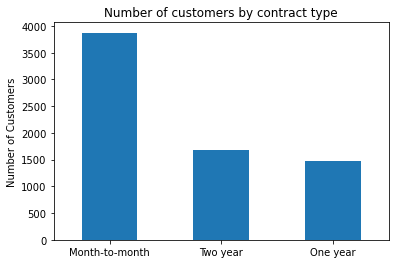

In [12]:
# Contracts information
ax = data["Contract"].value_counts().plot(kind="bar", rot=0, width=0.5)
ax.set_ylabel("Number of Customers")
ax.set_title("Number of customers by contract type")

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

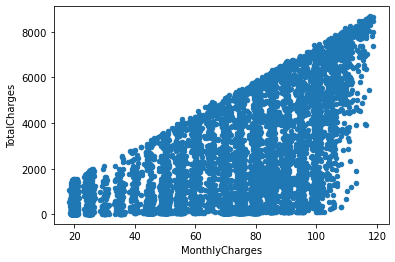

In [13]:
# MonthlyCharges and TotalCharges information
data[["MonthlyCharges", "TotalCharges"]].plot.scatter(x="MonthlyCharges", y="TotalCharges")

Text(0.5, 1.0, 'Churn Rate')

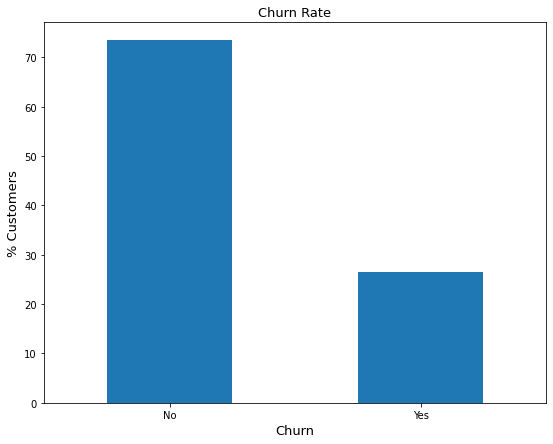

In [14]:
# Churn rates of customers
df = data["Churn"].value_counts() * 100.0 / len(data)
ax = df.plot(kind="bar", stacked=True, rot=0, figsize=(9,7))
ax.set_ylabel("% Customers", fontsize=13)
ax.set_xlabel("Churn", fontsize=13)
ax.set_title("Churn Rate", fontsize=13)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

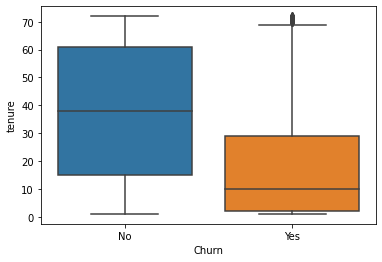

In [15]:
# Churn by tenure
sns.boxplot(x=data.Churn, y=data.tenure)

Text(0.5, 1.0, 'Churn by contract type')

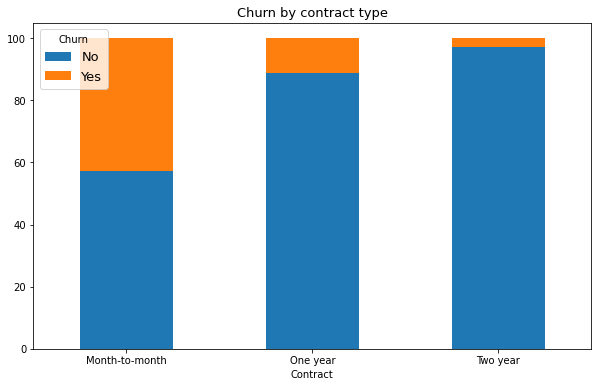

In [16]:
# Churn by contract type
df = data.groupby(["Contract", "Churn"]).size().unstack()
df1 = df.T * 100.0 / df.T.sum()
ax = df1.T.plot(kind="bar", stacked=True, rot=0, figsize=(10,6))
ax.legend(loc="best", prop={"size":13}, title="Churn")
ax.set_title("Churn by contract type", size=13)

Text(0.5, 1.0, 'Churn by seniority level')

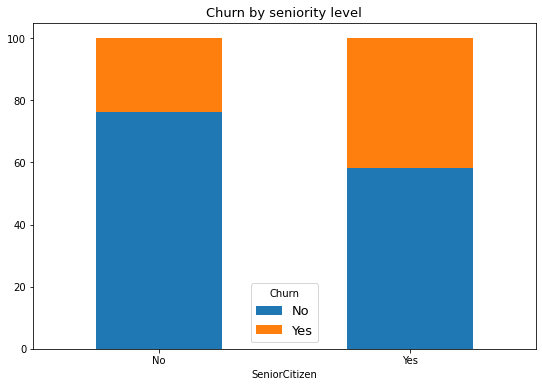

In [17]:
# Churn by seniority
df = data.groupby(["SeniorCitizen", "Churn"]).size().unstack()
df1 = df.T * 100.0 / df.T.sum()
ax = df1.T.plot(kind="bar", stacked=True, rot=0, figsize=(9,6))
ax.legend(loc="best", prop={"size":13}, title="Churn")
ax.set_title("Churn by seniority level", size=13)

In [18]:
# Model Building (Logistic Regression)
# Scaling all variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler

y = df_dummies["Churn"].values
X = df_dummies.drop(columns = ["Churn"])
features = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [20]:
# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

# Predictions
prediction_test = model.predict(X_test)
print("Classification report: \n", classification_report(y_test, prediction_test))
print("Accuracy score: ", accuracy_score(y_test, prediction_test))

Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1531
           1       0.68      0.52      0.59       579

    accuracy                           0.80      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110

Accuracy score:  0.8014218009478673


AxesSubplot(0.125,0.125;0.775x0.755)


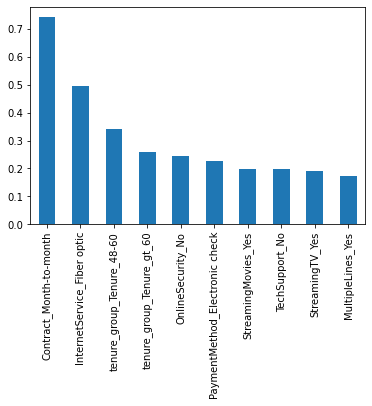

In [21]:
# Getting the weights of all variables
weights = pd.Series(model.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind="bar"))